# Simple Linear Regression

## 1.Introduction

**Simple Linear Regression** is one of the most fundamental techniques in machine learning and statistics. It is used to model the relationship between two variables:

- A **dependent variable** (also called the target or outcome variable)
- An **independent variable** (also called the predictor or feature)

### Linear Regression with One Variable

#### Notation
Here is a summary of some of the notation you will encounter.  

| General | Notation | Description | Python (if applicable) |
|:--------|:---------|:-------------|:-----------------------|
| $a$     |          | Scalar, non-bold                                  |                         |
| **a** |     | Vector, bold                                      |                         |
| **Regression** |   |                                                   |                         |
| **x**|     | Training, feature values | `x_train`        |
| **y** |     | Training, targets  | `y_train`       |
| $x^{(i)}, y^{(i)}$ | | $i_{th}$ training example                       | `x_i`, `y_i`            |
| $m$      |         | Number of training examples                       | `m`                     |
| $w$      |         | Parameter: weight                                 | `w`                     |
| $b$      |         | Parameter: bias                                   | `b`                     |
| $f_{w,b}(x^{(i)})$ | | Model output at $x^{(i)}$: $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ | `f_wb` |

### Hypothesis Function in Linear Regression

In linear regression, the hypothesis function **f** is represented as:  

$$
f_{w,b}(x) = wx + b
$$

#### Components:
- **f**: hypothesis function  
- **x**: input, feature  
- **ŷ (y-hat)**: prediction, estimated *y*  
- **w**: weight (coeffficient/slope of the regression line) 
- **b**: bias (intercept)  

This is also referred to as:  
- *Univariate linear regression*  
- *Linear regression with one variable/single feature x*  


## 2.Import necessary libraries

In [1]:
# Import necessary libraries
import numpy as np                    # For numerical operations and array handling
import pandas as pd                   # For data manipulation and analysis
import matplotlib.pyplot as plt       # For data visualization

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 3.Creating Sample Data

In [2]:
# Generate 100 random data points for x_train (feature)
x_train = 2 * np.random.rand(100, 1)  # 100 rows, 1 column

# Define the true relationship: y = 4 + 3*x + noise
noise = np.random.randn(100, 1)  # Gaussian noise with mean of 0 and a variance of 1
y_train = 4 + 3 * x_train + noise

# Print shapes to confirm
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Optional: print first 5 samples
print("x_train[:5]:\n", x_train[:5])
print("y_train[:5]:\n", y_train[:5])

x_train shape: (100, 1)
y_train shape: (100, 1)
x_train[:5]:
 [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]
y_train[:5]:
 [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (100, 1)
Number of training examples is: 100


## 4.Visualizing Data

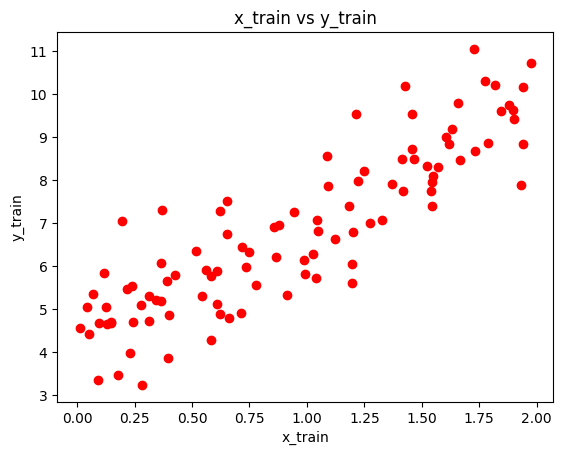

In [4]:
# Plot the data points
plt.scatter(x_train, y_train, c='r')
# Set the title
plt.title("x_train vs y_train")
# Set the y-axis label
plt.ylabel('y_train')
# Set the x-axis label
plt.xlabel('x_train')
plt.show()

## 5.Building a Linear Regression Model


In [5]:
#Initializing w and b
w = 5
b = 5
print(f"w: {w}")
print(f"b: {b}")

w: 5
b: 5


In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros_like(y_train)   #same shape and data type as y_train
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

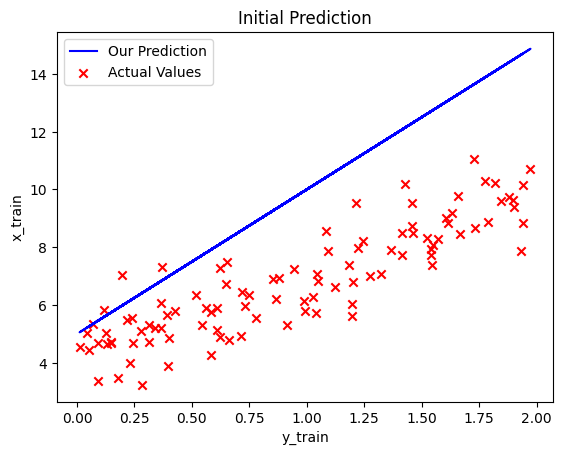

In [7]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Initial Prediction")
# Set the y-axis label
plt.ylabel('x_train')
# Set the x-axis label
plt.xlabel('y_train')
plt.legend()
plt.show()

## 6.Cost Function: 

The **squared error cost function** \( J(w,b) \) measures the difference between the predicted value $f_{w,b}(x^{(i)})$ and the actual value $y^{(i)}$.


$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2
$$

In [8]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

## 7.Gradient Descent Algorithm

The **update rule** for gradient descent is:

$$
w = w - \alpha \frac{\partial}{\partial w} J(w,b)
$$

$$
b = b - \alpha \frac{\partial}{\partial b} J(w,b)
$$

where 
$$
\frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \big(f_{w,b}(x^{(i)}) - y^{(i)}\big) x^{(i)}
$$

$$
\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \big(f_{w,b}(x^{(i)}) - y^{(i)}\big)
$$

### Components:
- $\alpha$: learning rate (controls step size)  
- $\frac{\partial}{\partial w} J(w,b)$: derivative (gradient) with respect to $w$  
- $\frac{\partial}{\partial b} J(w,b)$: derivative (gradient) with respect to $b$   

**Important:** \( w \) and \( b \) must be updated **simultaneously**.  
Updating \( w \) first and then using the new \( w \) to update \( b \) in the same iteration can lead to incorrect results.

(hence simultaneous update using vectorization)

- If $\frac{\partial}{\partial w} J(w) > 0$ (positive slope), $w$ **decreases**.  
- If $\frac{\partial}{\partial w} J(w) < 0$ (negative slope), $w$ **increases**.  

This ensures that $w$ always moves towards the **minimum of $J(w)$**.

### Impact of Learning Rate

- **Small $\alpha$**: Gradient descent may be **slow**.  
- **Large $\alpha$**: Gradient descent may **overshoot the minimum** or fail to converge, potentially **diverging**.  

Visualizations typically show:  
- **Slow convergence** with a small $\alpha$  
- **Oscillations/divergence** with a large $\alpha$

In [9]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1].item():0.2e} ",
                  f"dj_dw: {dj_dw.item():0.3e}, dj_db: {dj_db.item():0.3e}  ",
                  f"w: {w.item():0.3e}, b:{b.item():0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [11]:
import math
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final.item():8.4f},{b_final.item():8.4f})")

Iteration    0: Cost 2.40e+01  dj_dw: -7.384e+00, dj_db: -6.820e+00   w: 7.384e-02, b:6.82000e-02
Iteration 1000: Cost 4.08e-01  dj_dw: 2.725e-02, dj_db: -3.087e-02   w: 2.930e+00, b:4.03352e+00
Iteration 2000: Cost 4.03e-01  dj_dw: 4.986e-03, dj_db: -5.647e-03   w: 2.799e+00, b:4.18188e+00
Iteration 3000: Cost 4.03e-01  dj_dw: 9.122e-04, dj_db: -1.033e-03   w: 2.775e+00, b:4.20902e+00
Iteration 4000: Cost 4.03e-01  dj_dw: 1.669e-04, dj_db: -1.890e-04   w: 2.771e+00, b:4.21398e+00
Iteration 5000: Cost 4.03e-01  dj_dw: 3.053e-05, dj_db: -3.458e-05   w: 2.770e+00, b:4.21489e+00
Iteration 6000: Cost 4.03e-01  dj_dw: 5.585e-06, dj_db: -6.326e-06   w: 2.770e+00, b:4.21506e+00
Iteration 7000: Cost 4.03e-01  dj_dw: 1.022e-06, dj_db: -1.157e-06   w: 2.770e+00, b:4.21509e+00
Iteration 8000: Cost 4.03e-01  dj_dw: 1.869e-07, dj_db: -2.117e-07   w: 2.770e+00, b:4.21509e+00
Iteration 9000: Cost 4.03e-01  dj_dw: 3.420e-08, dj_db: -3.873e-08   w: 2.770e+00, b:4.21510e+00
(w,b) found by gradient desce

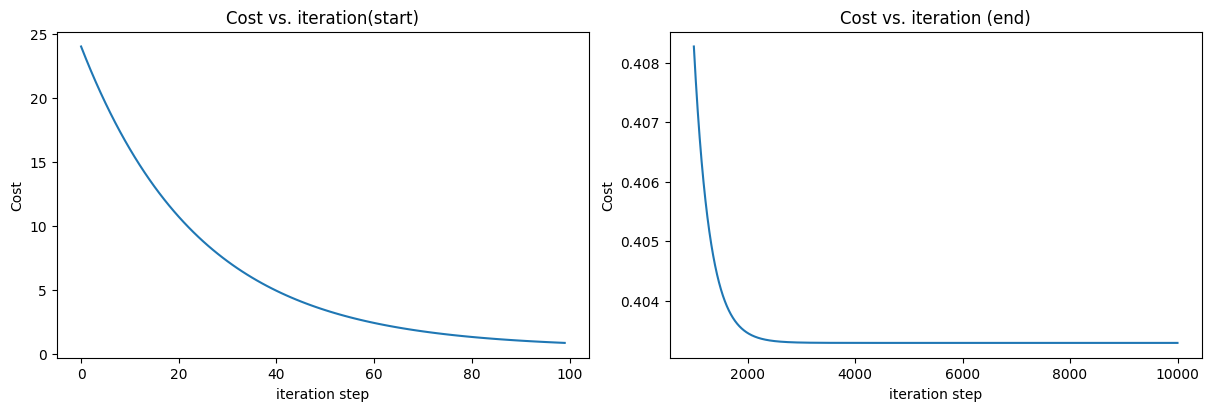

In [12]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

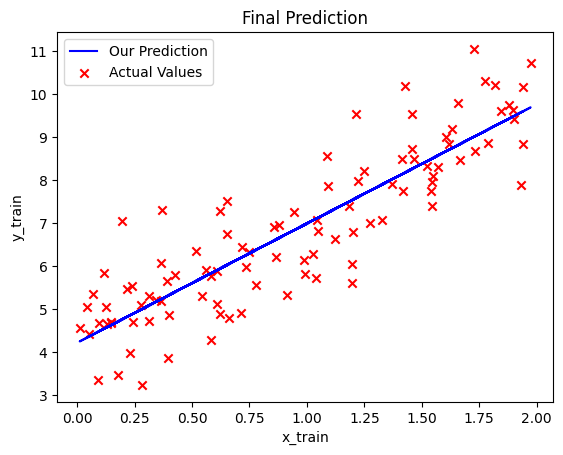

In [13]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Final Prediction")
# Set the y-axis label
plt.ylabel('y_train')
# Set the x-axis label
plt.xlabel('x_train')
plt.legend()
plt.show()

## 8.Model Evaluation

#### I. Mean Squared Error (MSE)
MSE = (1/m) × Σ(actual - predicted)²


#### II. R² Score (R-squared or Coefficient of Determination)
- Proportion of variance in the dependent variable explained by the model
- **Range**: 0 to 1 (can be negative for very poor models)
- **Interpretation**:
  - **1.0** = Perfect fit (model explains 100% of variance)
  - **0.8 - 1.0** = Strong model
  - **0.5 - 0.8** = Moderate model
  - **< 0.5** = Weak model
  - **Higher is better**


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, tmp_f_wb)
r2 = r2_score(y_train, tmp_f_wb)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"\nR² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.81

R² Score: 0.7693


# Simple Linear Regression using Scikit-Learn(SGDRegressor)

In [15]:
# Comprehensive SGD Regression Example with Normalization and Visualization

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 2:Data Generation
# Generate 100 random data points for x_train (feature)
x_train = 2 * np.random.rand(100, 1)  # 100 rows, 1 column

# Define the true relationship: y = 4 + 3*x + noise
noise = np.random.randn(100, 1)  # Gaussian noise with mean of 0 and a variance of 1
y_train = 4 + 3 * x_train + noise
y_train = y_train.ravel()   # Convert (100, 1) → (100,)

# Step 3: Normalize features
# scaler = StandardScaler()
# x_norm = scaler.fit_transform(x_train)

# Step 4: Train SGD Regressor
sgdr = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgdr.fit(x_train, y_train)

# Step 5: Display model details
print(f"SGD Regressor trained:\n{sgdr}")
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")

b = sgdr.intercept_
w = sgdr.coef_
print(f"Model parameters: w: {w}, b: {b}")

# Step 6: Make predictions
y_pred_sgd = sgdr.predict(x_train)            # Using sklearn's predict
y_pred_manual = np.dot(x_train, w) + b  # Using manual computation

# Verify predictions match
print(f"Predictions match: {(y_pred_sgd == y_pred_manual).all()}\n")

# Display first few predictions and targets
print(f"Prediction on training set (first 4): {y_pred_sgd[:4]}")
print(f"Target values (first 4): {y_train[:4]}\n")

SGD Regressor trained:
SGDRegressor(random_state=42)
Number of iterations completed: 27, Number of weight updates: 2701.0
Model parameters: w: [3.45539928], b: [3.47187044]
Predictions match: True

Prediction on training set (first 4): [8.96465124 6.94549413 7.45873697 6.875561  ]
Target values (first 4): [10.03577897  6.30815309  7.90524274  7.72974022]



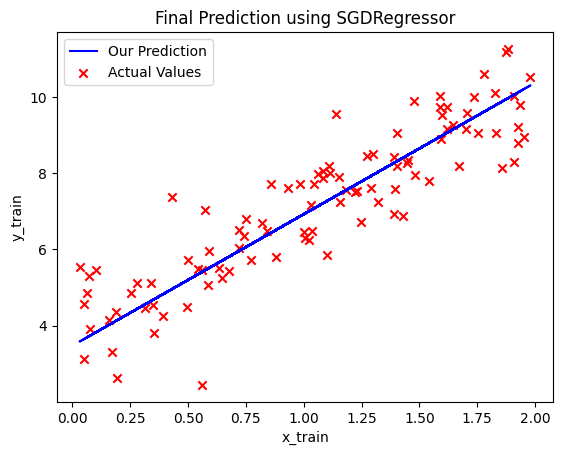

In [16]:
# Plot our model prediction
plt.plot(x_train, y_pred_sgd, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Final Prediction using SGDRegressor")
# Set the y-axis label
plt.ylabel('y_train')
# Set the x-axis label
plt.xlabel('x_train')
plt.legend()
plt.show()

In [17]:
mse = mean_squared_error(y_train, y_pred_sgd)
r2 = r2_score(y_train, y_pred_sgd)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"\nR² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.83

R² Score: 0.7935
